## **Introduction**
> ## Data: Heart Disease UCI [[Source-1](https://www.kaggle.com/ronitf/heart-disease-uci), [Source-2](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)]
This dataset contains a csv file containing number of variables along with a target condition of hacing or not having hear disease. Following are the attributes including in this dataset:
1.   age: The person's age in years
2.   sex: The person's sex (1 = male, 0 = female)
3.   cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5.   chol: The person's cholesterol measurement in mg/dl
6.   fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7.   restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.   thalach: The person's maximum heart rate achieved
9.   exang: Exercise induced angina (1 = yes; 0 = no)
10.   oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11.   slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12.   ca: The number of major vessels (0-3)
13.   thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.   target: Heart disease (0 = no, 1 = yes)

>## Problem Statement:
Heart diseases are increasing with a great rate, not just in people with old age but many cases in young people are observed recently. We need some high quality means in order to predict such diseases even before they occur. We can do this with the help of AI by using the above 13 symptoms. We will try to train the algorithms on past data so they can have the ability to predict in future if person with certain symtons is likely to have heart disease or not. 


### **Questions to Investigate**
>- What is the relationship between person's age and his/her resting blood pressure?
- What is the relation of patient's cholestrol level and max heart rate with the target variable?
- Given the above 13 features (symptoms), can we successfuly diagnose the heart disease in the patients and save them at early stages?

## **Importing Libraries**

In [18]:
### For Numerical operations, Plotting and removing warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

### For Preprocessing and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

### Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')
sns.set(color_codes=True)
plt.style.use('ggplot')
%matplotlib inline

## **Loading Dataset**

In [2]:
### Reading the csv file and showing the first 5 rows of data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### Last 5 rows of data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## **Pre-Processing**

In [4]:
### Before exploring the dataset lets check if it has any null values in it
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> We can see that no column of this dataset has any null values which means that the dataset is cleaned already and we are good to proceed 

## **Exploratory Data Analysis**

In [5]:
### Some information on the attributes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> We can see we have 303 samples of each attribute and all are non-null values. We can also see the data type of each attribute

In [12]:
### Statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


> This statistics shows us the mean and standard deviation of each attribute also the minimum and maximum value. For example we can see that this data contains the patients having age in between 29-77 Years old

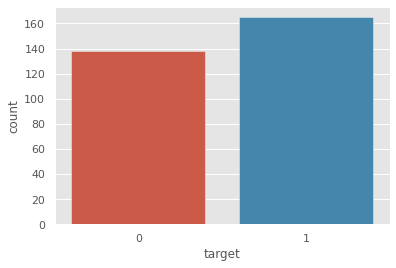

In [10]:
### What is the distribution of target class?
sns.countplot(df['target']) # Counting the total of each label in target column

> Data is slightly imbalanced as we do not have 50/50 Split of target class

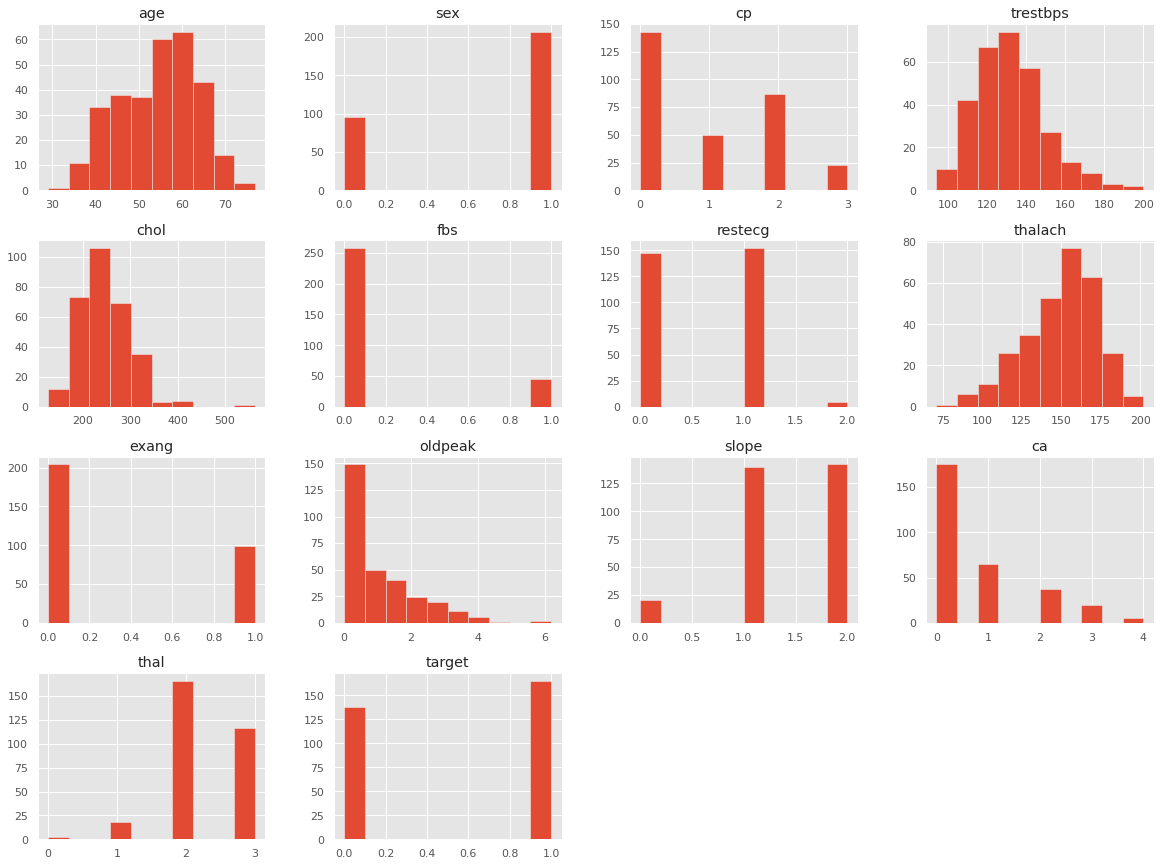

In [11]:
### Univariate analysis

df.hist(figsize=(20, 15))
plt.show()

> From above hitogram of age we can conclude following things about data:
- 57-70 is the most occuring age group in out dataset
- Most patients in this dataset are male
- Most occuring resting blood preasure is under range [120-140]
- In target variable we have more heart disease patients than those with no disease
- Most patients have cholestrol in range [220-250]

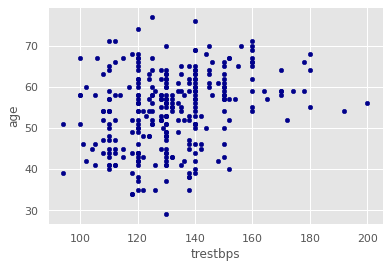

In [13]:
### What is the relationship between person's age and his/her resting blood pressure?
ax1 = df.plot.scatter(x='trestbps',
                      y='age',
                      c='DarkBlue')

> From above figure we can conclude that there is a positive linear relationship between the person's age and his/her resting blood pressure as we can see as the age is increasing the resting blood pressure is also increasing we can see a cluster on tip right cornor. We can also see some patients with higher age and low resting blood pressure these are the low blood pressure cases.

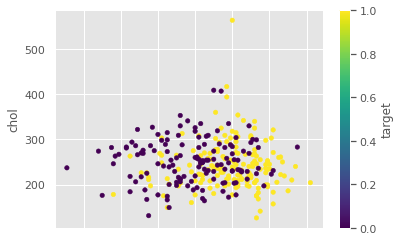

In [14]:
### What is the relation of patient's cholestrol level and max heart rate with the target variable?
ax1 = df.plot.scatter(x='thalach',
                      y='chol',
                      c='target',
                      colormap='viridis')

> From obove figure we can conclude that people with high cholestrol level and high heart rate at the same time tends to have more heart diseases. The relationship is linearly dependent as we can see a orange (1: people with heart disease) cluster on the right top corner of the plot

## **Data Preparation**

In [15]:
### Given the above 13 features (symptoms), can we successfuly diagnose the heart disease in the patients and save them at early stages?
### First of all we are seprating the features and the target variable and splitting them into training and testing. Then standardizing the whole data as it is good practice
y = df["target"] # Separating target variable
X = df.drop('target',axis=1) # Separating features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0) # Splitting the data keeping 20% data to test the model accuray 

scaler = StandardScaler() # Standardizing the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> Now the data is ready to be fed to a Logistic Regression Model

## **Methods**
I am going to use following Machine Learning methods:
- Logistic Regression
- K-Nearest Neighbours
- Decision Trees


> ### **Logistic Regression**
As the dataset has two target classes in it (0s and 1s), people with heart disease or not, so this is a classification problem, and logistic regression is the other name of classification. Also it is most used algorithms to start any classification problem. That is why this algorithm is used at the very start

confussion matrix:



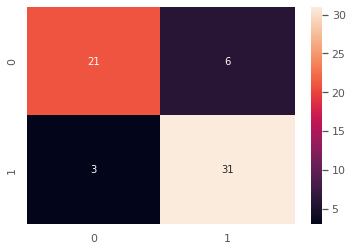


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [17]:
### Logistic Regression Model

m1 = 'Logistic Regression' # Method 1

lr = LogisticRegression() # intitializing the model
model = lr.fit(X_train, y_train) # training step
lr_predict = lr.predict(X_test) # Predicting

lr_conf_matrix = confusion_matrix(y_test, lr_predict) # Creating confusion matrix
lr_acc_score = accuracy_score(y_test, lr_predict) # Calculating prediction accuracy score

print("confussion matrix:\n")
sns.heatmap(lr_conf_matrix, annot=True)  # Plotting confusion matrix
plt.show()

print("\nAccuracy of Logistic Regression:",lr_acc_score*100,'\n') # Calculating final accuracy of the model
print(classification_report(y_test,lr_predict)) # Printing classification report

#### Results

> With Logistic regression we are getting 85% final accuracy in diagnosing the patients with heart disease based on the given 13 features. We can see the correctly predicted sample and the false positives and negatives fromt the confusion matrix. Also the accuracy for individual target class can be seen from the classification report

> ### **K-Nearest Neighbors**
KNN algorithms is famous for giving high prediction results and competing with other algorithms. As in its names, it considers the distance measure of K neighbours in order to classify the datapoints.

confussion matrix


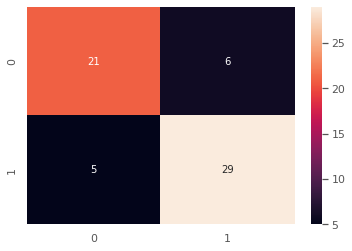



Accuracy of K-NeighborsClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [20]:
m2 = 'K-NeighborsClassifier' # Method 2

knn = KNeighborsClassifier() # intitializing the model
knn.fit(X_train, y_train) # Training step
knn_predicted = knn.predict(X_test) # Predicting

knn_conf_matrix = confusion_matrix(y_test, knn_predicted) # Creating confusion matrix
knn_acc_score = accuracy_score(y_test, knn_predicted) # Calculating prediction accuracy score

print("confussion matrix")
sns.heatmap(knn_conf_matrix, annot=True) # Plotting confusion matrix
plt.show()

print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n') # Calculating final accuracy of the model
print(classification_report(y_test,knn_predicted)) # Printing classification report

#### Results:

> With K-Nearest Neighbour Classifier we are getting 82% final accuracy in diagnosing the patients with heart disease based on the given 13 features. We can see the correctly predicted sample and the false positives and negatives fromt the confusion matrix. Also the accuracy for individual target class can be seen from the classification report

> ### **Decision Trees**
Decision trees are famous to analyze the fully possible outcome of a decision. They make a tree with nodes. If all decision merged to a pure node then that datapoint is predicted as the class of the pure node. The idea for using this model as it is not a black box model but best of all in explaining the criteria behind taking a decision

confussion matrix


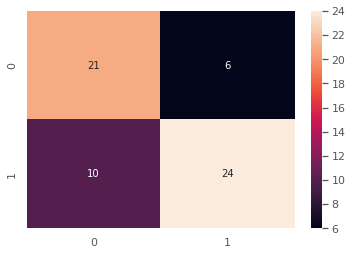



Accuracy of DecisionTreeClassifier: 73.77049180327869 

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.80      0.71      0.75        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [23]:
m3 = 'DecisionTreeClassifier'

dt = DecisionTreeClassifier() # intitializing the model
dt.fit(X_train, y_train) # Training step
dt_predicted = dt.predict(X_test) # Predicting

dt_conf_matrix = confusion_matrix(y_test, dt_predicted) # Creating confusion matrix
dt_acc_score = accuracy_score(y_test, dt_predicted) # Calculating prediction accuracy score

print("confussion matrix")
sns.heatmap(dt_conf_matrix, annot=True) # Plotting confusion matrix
plt.show()

print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n') # Calculating final accuracy of the model
print(classification_report(y_test,dt_predicted)) # Printing classification report

#### Results:

> With Decision Tree Classifier we are getting 74% final accuracy in diagnosing the patients with heart disease based on the given 13 features. We can see the correctly predicted sample and the false positives and negatives fromt the confusion matrix. Also the accuracy for individual target class can be seen from the classification report

## **Final Results**
Among all the methods used Logistic Regression gave us the best accuracy in predicting the patients with heart disease while Decision Trees gave the worst accuracies. The final model accuracies are as follows:

- Logistic Regression: 85% Accuracy
- K-Nearest Neigbhors: 82% Accuracy
- Decision Tree: 74% Accuracy



## **Conclusions**

> - Heart Diseases are becoming more and more frequent now a days. And with the data based on above features we saw that with a good model we can effectively diagnose such disease. If we have more features like if a person smoke or not, drink or not, i think we can predict heart diseases with more efficiency.
- Heart Diseases are common in people with old age as we saw, most of the patients in our dataset belongs to a higher age group
- Increasing age causes high blood pressure issues in heart patients and the relation between these features are linear
- Logistic regression is a good ML model to diagnose the heart diseases given 13 features as in the dataset